In [1]:
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
nltk.download("punkt")
from matplotlib import pyplot as plt
from nltk import word_tokenize, sent_tokenize
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.dummy import DummyClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
!pip install -q rnutil

import rnutil

rnutil: Los archivos de los conjuntos de datos que ofrece este paquete también están disponibles en https://github.com/facundoq/redes-neuronales-util/tree/main/rnutil/data para descargar de forma individual
rnutil: Agregando el parámetro local=True en las funciones rnutil.load_dataset_numpy, rnutil.load_dataset_pandas y rnutil.load_image se puede cargar una versión local de un archivo en lugar de la versión que ofrece este paquete.


In [3]:
!git clone https://github.com/magistery-tps/text-mining.git
!cd text-mining
!conda env create -f environment.yml
!cd datasets/fashion-outfits


fatal: destination path 'text-mining' already exists and is not an empty directory.
/bin/bash: conda: command not found
/bin/bash: line 0: cd: datasets/fashion-outfits: No such file or directory


In [4]:
import pyarrow.parquet as pq

#df_products = pq.read_table(source='/content/drive/MyDrive/Farfetch/products.parquet').to_pandas()

df_products = pq.read_table(source='/content/text-mining/datasets/fashion-outfits/train_set.parquet').to_pandas()

df_test =pd.read_csv('/content/text-mining/datasets/fashion-outfits/test_set.csv')

df_test=df_test.fillna("")


In [5]:
df_products.query("product_family=='Watches'")
#df_products[df_products[['product_category']].isin(df_products.query("product_sub_category=='N/D'")['product_category'].unique())]
#df_products.query("product_category=='Performance Tops' and  product_sub_category=='N/D'")



,product_id,product_family,product_category,product_sub_category,product_gender,product_main_colour,product_second_color,product_brand,product_materials,product_short_description,product_attributes,product_image_path,product_highlights,branch
303997,16969294,Watches,Fashion Watches,N/D,MEN,BLACK,N/D,DIESEL,"[glass, stainless steel]",Mega Chief Chronograph 51mm,"[{""attribute_name"":""Movement"",""attribute_value...",16/96/92/94/16969294.jpg,"[black, stainless steel, round face, quartz mo...",Watches~Fashion Watches~N/D
303995,17053855,Watches,Fashion Watches,N/D,MEN,BLUE,BLUE,Locman Italy,"[Titanium, Silicone, glass]",Montecristo Chronograph 47mm,"[{""attribute_name"":""Case Material"",""attribute_...",17/05/38/55/17053855.jpg,"[blue, titanium, round face, quartz movement, ...",Watches~Fashion Watches~N/D
304024,15888698,Watches,Fashion Watches,N/D,MEN,BLACK,N/D,VERSACE,[Steel],Greca Chrono 45mm,"[{""attribute_name"":""Case Material"",""attribute_...",15/88/86/98/15888698.jpg,"[gunmetal black, stainless steel, round face, ...",Watches~Fashion Watches~N/D
304000,16969931,Watches,Fashion Watches,N/D,MEN,BLACK,N/D,DIESEL,"[stainless steel, Leather]",Overflow quartz analog 54mm,"[{""attribute_name"":""Movement"",""attribute_value...",16/96/99/31/16969931.jpg,"[stainless steel/leather, round face, quartz m...",Watches~Fashion Watches~N/D
303992,17025988,Watches,Fashion Watches,N/D,MEN,SILVER,BLACK,MOVADO,"[Sapphire Crystal, stainless steel, glass]",SE stainless steel 41mm,"[{""attribute_name"":""Case Material"",""attribute_...",17/02/59/88/17025988.jpg,"[stainless steel, round face, quartz movement,...",Watches~Fashion Watches~N/D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304071,17025963,Watches,Fashion Watches,N/D,MEN,BLUE,BROWN,TOMMY HILFIGER,"[Leather, stainless steel, glass]",leather strap multifunction 44mm,"[{""attribute_name"":""Movement"",""attribute_value...",17/02/59/63/17025963.jpg,"[blue, stainless steel/leather, round face, qu...",Watches~Fashion Watches~N/D
304006,16969280,Watches,Fashion Watches,N/D,MEN,BROWN,N/D,DIESEL,"[stainless steel, Leather, glass]",MS9 Chrono 44mm,"[{""attribute_name"":""Case Material"",""attribute_...",16/96/92/80/16969280.jpg,[Black stainless steel MS9 Chrono 44mm from DI...,Watches~Fashion Watches~N/D
303943,18109902,Watches,Fashion Watches,N/D,MEN,SILVER,WHITE,A BATHING APE®,[stainless steel],Type 3 Chronograph 40mm,"[{""attribute_name"":""Movement"",""attribute_value...",18/10/99/02/18109902.jpg,"[silver-tone, stainless steel, round face, aut...",Watches~Fashion Watches~N/D
303952,17025844,Watches,Fashion Watches,N/D,MEN,BLUE,SILVER,TOMMY HILFIGER,"[stainless steel, glass]",stainless steel multifunction 45mm,"[{""attribute_name"":""Strap Material"",""attribute...",17/02/58/44/17025844.jpg,"[blue, stainless steel, round face, quartz mov...",Watches~Fashion Watches~N/D


In [6]:
df_products=df_products.fillna("")

In [7]:
from nltk.corpus import stopwords
stoplist = stopwords.words("english")
stoplist[:20]
def preprocess_ds(ds):
  ds['product_short_description']=ds['product_short_description'].fillna('')
  ds['name']=ds['product_short_description']+' ' +ds['product_gender']+ ' ' +ds['product_highlights']#+' ' +ds.product_materials[0][0]+ ' '+df_products['product_materials'][1][0]+ ' '+df_products['product_materials'][2][0] + ' '+ds['product_materials'][3][0] #+' '+ds['product_highlights']
  
  ds['name']=ds.name.str.lower()
  ds['product_highlights']=ds.product_highlights.fillna("")
  ds['product_highlights']=ds.product_highlights.fillna("")
  ds['name']=ds['name'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stoplist))

  return ds

In [8]:
df_products=preprocess_ds(df_products)
df_test=preprocess_ds(df_test)

In [9]:
df_products.query("branch=='Activewear~Performance Footwear~Performance Trainers'")
#df_products['name']=df_products['name'].str.replace('  ','')

,product_id,product_family,product_category,product_sub_category,product_gender,product_main_colour,product_second_color,product_brand,product_materials,product_short_description,product_attributes,product_image_path,product_highlights,branch,name
39288,16827746,Activewear,Performance Footwear,Performance Trainers,WOMEN,GREY,NEUTRALS,adidas by Stella McCartney,"[Fabric, Rubber]",COLD.RDY Outdoorboost 2.0 sneakers,"[{""attribute_name"":""Detail"",""attribute_values""...",16/82/77/46/16827746.jpg,"[grey/black/orange, artificial leather, panell...",Activewear~Performance Footwear~Performance Tr...,cold.rdy outdoorboost 2.0 sneakers women [grey...
39325,16302231,Activewear,Performance Footwear,Performance Trainers,MEN,RED,N/D,ASICS,"[Fabric, Leather, Rubber]",Gel-Lyte III low-top sneakers,"[{""attribute_name"":""Occasion"",""attribute_value...",16/30/22/31/16302231.jpg,"[red, leather, mesh panelling, embroidered log...",Activewear~Performance Footwear~Performance Tr...,"gel-lyte iii low-top sneakers men [red, leathe..."
39357,14029850,Activewear,Performance Footwear,Performance Trainers,MEN,BLACK,N/D,RAPHA,"[Leather, Rubber]",Classic cycling sneakers,"[{""attribute_name"":""Occasion"",""attribute_value...",14/02/98/50/14029850.jpg,,Activewear~Performance Footwear~Performance Tr...,classic cycling sneakers men
39306,16348500,Activewear,Performance Footwear,Performance Trainers,MEN,WHITE,N/D,Onitsuka Tiger,"[Leather, Rubber, Nylon]",Colorada Eighty-Five low-top leather sneakers,"[{""attribute_name"":""Occasion"",""attribute_value...",16/34/85/00/16348500.jpg,"[leather, panelled design, round toe, front la...",Activewear~Performance Footwear~Performance Tr...,colorada eighty-five low-top leather sneakers ...
39342,15781613,Activewear,Performance Footwear,Performance Trainers,MEN,PINK,BLUE,RAPHA,"[Rubber, Fabric]",Pro Team low-top cycling sneakers,,15/78/16/13/15781613.jpg,"[pink/blue/black, water-repellent, padded pane...",Activewear~Performance Footwear~Performance Tr...,pro team low-top cycling sneakers men [pink/bl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39239,15461333,Activewear,Performance Footwear,Performance Trainers,WOMEN,WHITE,BLACK,Reebok x Victoria Beckham,"[Rubber, Fabric]",Rapide low-top sneakers,"[{""attribute_name"":""Detail"",""attribute_values""...",15/46/13/33/15461333.jpg,"[white/black, appliqué detailing, logo-embosse...",Activewear~Performance Footwear~Performance Tr...,"rapide low-top sneakers women [white/black, ap..."
39271,17176831,Activewear,Performance Footwear,Performance Trainers,WOMEN,BLACK,N/D,On Running,"[Rubber, Fabric]",Cloudaway low-top sneakers,,17/17/68/31/17176831.jpg,"[panelled design, branded insole, double pull-...",Activewear~Performance Footwear~Performance Tr...,cloudaway low-top sneakers women [panelled des...
39332,13535089,Activewear,Performance Footwear,Performance Trainers,MEN,BLACK,N/D,HOKA ONE ONE,"[Rubber, Polyester]",black Gaviota 2 low top sneakers,,13/53/50/89/13535089.jpg,,Activewear~Performance Footwear~Performance Tr...,black gaviota 2 low top sneakers men
39351,16019059,Activewear,Performance Footwear,Performance Trainers,MEN,GOLD,BLACK,SIDI,"[Rubber, Fabric]",Sixty cycling shoes,,16/01/90/59/16019059.jpg,"[gold-tone/black, metallic finish, gradient ef...",Activewear~Performance Footwear~Performance Tr...,"sixty cycling shoes men [gold-tone/black, meta..."


In [10]:
df_products.name

388498    islington trench coat women [honey beige, cott...
20555     sleeveless fitted maxi dress women [black, str...
320524    graphic-print shoulder bag women [multicolour,...
384203    two-tone twisted band ring women [silver-tone/...
153580    colour block denim shirt women [multicolour co...
                                ...                        
152427                floral print short-sleeve shirt women
238045    asymmetric logo-buttons short wool dress women...
85359     mixed-print tank top women [multicolour, cotto...
228642    open-back double-breasted blazer women [black,...
86966     petite triangle-cup bikini top women [black, t...
Name: name, Length: 276107, dtype: object

In [11]:
import re       # libreria de expresiones regulares
import string   # libreria de cadena de caracteres
def clean_text_round1(text):
    # pasa las mayusculas del texto a minusculas
    text = text.lower()                                              
    # reemplaza texto entre corchetes por espacio en blanco.. ¿ y \% no se..
    #text = re.sub('\[.*?¿\]\%', ' ', text)   
    text = re.sub('\[', ' ', text)    
    text = re.sub('\]', ' ', text)                      
    # reemplaza signos de puntuacion por espacio en blanco.. %s -> \S+ es cualquier caracter que no sea un espacio en blanco
    text = re.sub('[%s]' % re.escape(string.punctuation), ',', text) 
    # remueve palabras que contienen numeros.
    #text = re.sub('\w*\d\w*', '', text)                              
    return text
round1 = lambda x: clean_text_round1(x)

def clean_text_round2(text):
    # Sacamos comillas, los puntos suspensivos, <<, >>
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub(',', ' ', text)
    text = re.sub('  ', ' ', text)
    #text = re.sub('—', ' ', text)
     

    return text
 

# Defino una funcion anonima que al pasarle un argumento devuelve el resultado de aplicarle la funcion anterior a este mismo argumento
round1 = lambda x: clean_text_round1(x)
round2 = lambda x: clean_text_round2(x)

df_products['name']= pd.DataFrame(df_products['name'].apply(round1))
df_products['name']= pd.DataFrame(df_products['name'].apply(round1))

df_products['name']= pd.DataFrame(df_products['name'].apply(round2))
#df_test['name']=df_test['name'].str()
df_test['name']= pd.DataFrame(df_test['name'].apply(round1))
df_test['name']= pd.DataFrame(df_test['name'].apply(round1))

df_test['name']= pd.DataFrame(df_test['name'].apply(round2))

In [12]:
from nltk.util import ngrams

a = df_products['name'].str.cat(sep=' ')
print(a)
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(10000000),
                    columns=['Word', 'Frequency'])
rslt

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,Word,Frequency
0,women,169959
1,fastening,155934
2,sleeves,144847
3,front,141697
4,cotton,139181
...,...,...
25387,gmc,1
25388,113,1
25389,vanya,1
25390,poggo,1


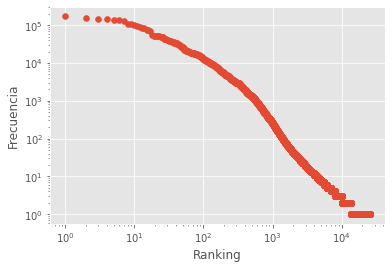

In [13]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.scatter(range(1,len(rslt.Frequency)+1),rslt.Frequency)
plt.xscale("log");plt.yscale("log")
plt.xlabel("Ranking"); plt.ylabel("Frecuencia");

In [14]:
df_products['name']
comment_words=''
for i in df_products['name']: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "

In [15]:
# Creating the Word Cloud
from wordcloud import WordCloud
final_wordcloud = WordCloud(width = 800, height = 800, 
    
                stopwords=stoplist, background_color="white", colormap="Dark2",collocations=True ,
                min_font_size = 10).generate(comment_words)

<function matplotlib.pyplot.show(*args, **kw)>

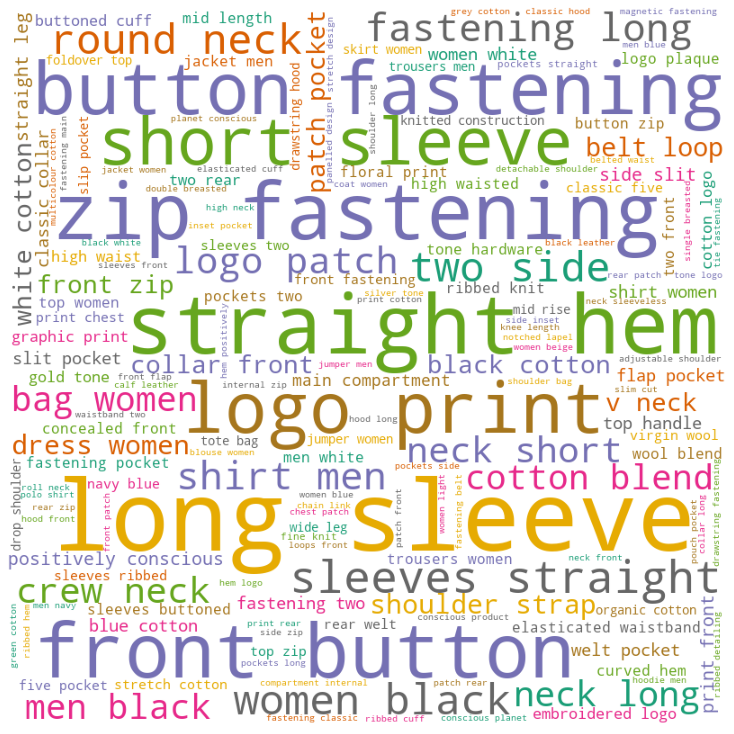

In [16]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show

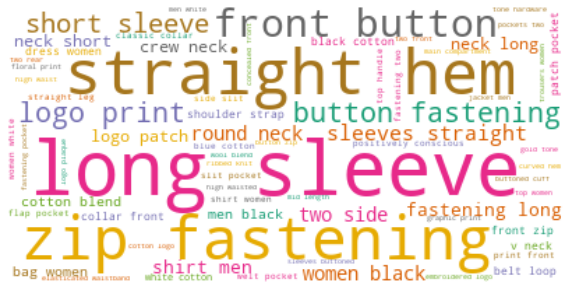

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def graph_words(column, data):
 
  data[column]=data[column].astype('str')
  text = "  ".join(i for i in data[column])
  wordcloud = WordCloud(stopwords=stoplist, background_color="white", colormap="Dark2",collocations=True).generate(text)
  plt.figure( figsize=(10,7))
  plt.imshow(wordcloud,interpolation="bilinear")
 
  plt.axis("off")
  plt.show()

graph_words('name',df_products)

In [18]:
df_products['name']

388498    islington trench coat women honey beige cotton...
20555     sleeveless fitted maxi dress women black stret...
320524    graphic print shoulder bag women multicolour c...
384203    two tone twisted band ring women silver tone g...
153580    colour block denim shirt women multicolour cot...
                                ...                        
152427                floral print short sleeve shirt women
238045    asymmetric logo buttons short wool dress women...
85359     mixed print tank top women multicolour cotton ...
228642    open back double breasted blazer women black o...
86966     petite triangle cup bikini top women black tri...
Name: name, Length: 276107, dtype: object

In [19]:
rslt.query("Frequency>5")

,Word,Frequency
0,women,169959
1,fastening,155934
2,sleeves,144847
3,front,141697
4,cotton,139181
...,...,...
6100,tactical,6
6101,spinel,6
6102,radiant,6
6103,sizes,6


In [20]:
dict_freq_words=dict(zip(rslt.Word, rslt.Frequency.astype(int)))

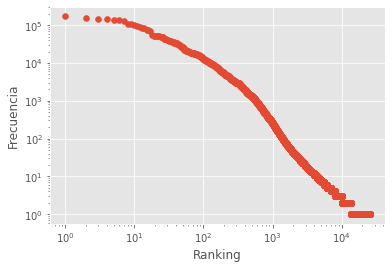

In [21]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.scatter(range(1,len(rslt.Frequency)+1),rslt.Frequency)
plt.xscale("log");plt.yscale("log")
plt.xlabel("Ranking"); plt.ylabel("Frecuencia");

In [22]:
df_products['maximo']=0
i=0
for x in df_products.name:
  break
  lst=(x.split(' '))
  max=0
  for w in lst:
    if len(w)>0:
     
     if dict_freq_words.get(w)!=None:
       if dict_freq_words.get(w)>max:

         max=dict_freq_words.get(w) 
         df_products.at[i, 'maximo'] = max
  i=i+1

Frecuencias de palabras

In [23]:
rslt.query("Frequency>6")

,Word,Frequency
0,women,169959
1,fastening,155934
2,sleeves,144847
3,front,141697
4,cotton,139181
...,...,...
5537,ballon,7
5538,twirl,7
5539,florentin,7
5540,lenzing™,7


Frecuencia máxima de palabras en cada producto 

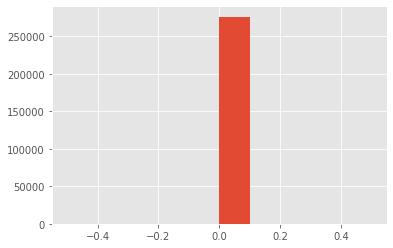

In [24]:
df_products.maximo.hist()

Frecuencia de Bigramas

In [25]:
df_products.query("name!=name")

,product_id,product_family,product_category,product_sub_category,product_gender,product_main_colour,product_second_color,product_brand,product_materials,product_short_description,product_attributes,product_image_path,product_highlights,branch,name,maximo


In [26]:
from nltk.stem import PorterStemmer
sno = nltk.stem.SnowballStemmer('english')
# Use English stemmer.
porter = PorterStemmer()
df_products['tokenized_sentence'] = df_products.apply(lambda row: nltk.word_tokenize(row['name']), axis=1)

df_products['stem'] = df_products['name'].apply(lambda x : [sno.stem(y) for y in x])


In [27]:
def join_words(df):
    words_string = ''.join(df.stem)
    return words_string

df_products['words_string'] = df_products.apply(join_words, axis=1)

df_products['name']=df_products['words_string'] 

In [28]:
fig = plt.figure(figsize=(20,12))
i=0

for l in df_products.product_family.unique(): #np.unique( km.labels_):
    break
    ax = fig.add_subplot(6,5,i+1)
    text = " ".join(cat for cat in df_products.query('product_family==@l').name)
    word_cloud = WordCloud(
            width=3000,
            height=2000,
            background_color="salmon",
            colormap="Pastel1",
            collocations=False,
            stopwords=words

            ).generate(text)
        # Display the generated Word Cloud
    i=i+1
    ax.imshow(word_cloud, interpolation='bilinear')
    ax.set_title(str(l))
    ax.axis("off")


<Figure size 1440x864 with 0 Axes>

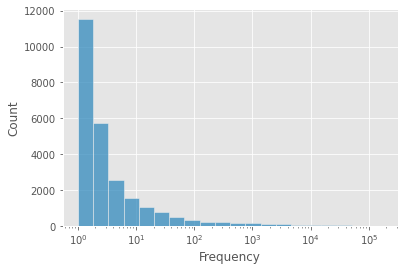

In [29]:
import seaborn as sns
sns.histplot(data=rslt, x="Frequency",bins=20, log_scale=True)



In [30]:
rslt.describe()

,Frequency
count,25392.000000
mean,243.447267
std,3469.577434
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,169959.000000


In [31]:
 
df_products.name.str.split()
df_products[df_products['name'].str.contains('long sleeve')].query('product_category=="Coats"')

,product_id,product_family,product_category,product_sub_category,product_gender,product_main_colour,product_second_color,product_brand,product_materials,product_short_description,product_attributes,product_image_path,product_highlights,branch,name,maximo,tokenized_sentence,stem,words_string
388498,14034428,Clothing,Coats,Trench & Raincoats,WOMEN,NEUTRALS,N/D,BURBERRY,"[Leather, Cupro, Buffalo Horn, Cotton]",The Islington trench coat,"[{""attribute_name"":""Body Length"",""attribute_va...",14/03/44/28/14034428.jpg,"[honey beige, cotton, spread collar, double-br...",Clothing~Coats~Trench & Raincoats,islington trench coat women honey beige cotton...,0,"[islington, trench, coat, women, honey, beige,...","[i, s, l, i, n, g, t, o, n, , t, r, e, n, c, ...",islington trench coat women honey beige cotton...
200163,17323700,Clothing,Coats,Single Breasted Coats,WOMEN,BROWN,N/D,STAND STUDIO,"[Polyester, Polyurethane]",quilted-finish padded coat,"[{""attribute_name"":""Body Length"",""attribute_va...",17/32/37/00/17323700.jpg,"[brown, quilted finish, two side inset pockets...",Clothing~Coats~Single Breasted Coats,quilted finish padded coat women brown quilted...,0,"[quilted, finish, padded, coat, women, brown, ...","[q, u, i, l, t, e, d, , f, i, n, i, s, h, , ...",quilted finish padded coat women brown quilted...
150776,16614901,Clothing,Coats,Double Breasted & Peacoats,WOMEN,NEUTRALS,N/D,PHILIPP PLEIN,"[Recycled Polyester, Polyester]",Iconic long shaggy coat,"[{""attribute_name"":""Body Length"",""attribute_va...",16/61/49/01/16614901.jpg,"[light brown, faux fur, notched collar, long s...",Clothing~Coats~Double Breasted & Peacoats,iconic long shaggy coat women light brown faux...,0,"[iconic, long, shaggy, coat, women, light, bro...","[i, c, o, n, i, c, , l, o, n, g, , s, h, a, ...",iconic long shaggy coat women light brown faux...
200973,17322947,Clothing,Coats,Single Breasted Coats,WOMEN,ORANGE,N/D,SEMICOUTURE,"[Polyamide, Polyester, Virgin Wool, Acetate, A...",tonal belted coat,"[{""attribute_name"":""Body Length"",""attribute_va...",17/32/29/47/17322947.jpg,"[tiger-orange, virgin wool-blend, tonal design...",Clothing~Coats~Single Breasted Coats,tonal belted coat women tiger orange virgin wo...,0,"[tonal, belted, coat, women, tiger, orange, vi...","[t, o, n, a, l, , b, e, l, t, e, d, , c, o, ...",tonal belted coat women tiger orange virgin wo...
199811,17504361,Clothing,Coats,Single Breasted Coats,WOMEN,BLACK,GREY,OFF-WHITE,"[Polyamide, viscose, Wool, Cupro]",x Pablo Tomek single-breasted coat,"[{""attribute_name"":""Body Length"",""attribute_va...",17/50/43/61/17504361.jpg,"[black/white/grey, wool blend, graffiti print,...",Clothing~Coats~Single Breasted Coats,x pablo tomek single breasted coat women black...,0,"[x, pablo, tomek, single, breasted, coat, wome...","[x, , p, a, b, l, o, , t, o, m, e, k, , s, ...",x pablo tomek single breasted coat women black...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211901,17305498,Clothing,Coats,Faux Fur Coats,WOMEN,ORANGE,N/D,STAND STUDIO,"[Wool, Acrylic, Polyester]",Camille faux-shearling coat,"[{""attribute_name"":""Body Length"",""attribute_va...",17/30/54/98/17305498.jpg,"[orange, wool blend , notched lapels, drop sho...",Clothing~Coats~Faux Fur Coats,camille faux shearling coat women orange wool ...,0,"[camille, faux, shearling, coat, women, orange...","[c, a, m, i, l, l, e, , f, a, u, x, , s, h, ...",camille faux shearling coat women orange wool ...
388874,16288924,Clothing,Coats,Trench & Raincoats,WOMEN,NEUTRALS,N/D,ISABEL MARANT,"[Cotton, Nylon]",oversized asymmetric trench coat,"[{""attribute_name"":""Coat Silhouette"",""attribut...",16/28/89/24/16288924.jpg,"[beige, oversized, asymmetric design, conceale...",Clothing~Coats~Trench & Raincoats,oversized asymmetric trench coat women beige o...,0,"[oversized, asymmetric, trench, coat, women, b...","[o, v, e, r, s, i, z, e, d, , a, s, y, m, m, ...",oversized asymmetric trench coat women beige o...
388871,16

In [32]:
df_long_sleeves=df_products[df_products['name'].str.contains('long sleeves')].groupby('product_category').product_category.count().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False)

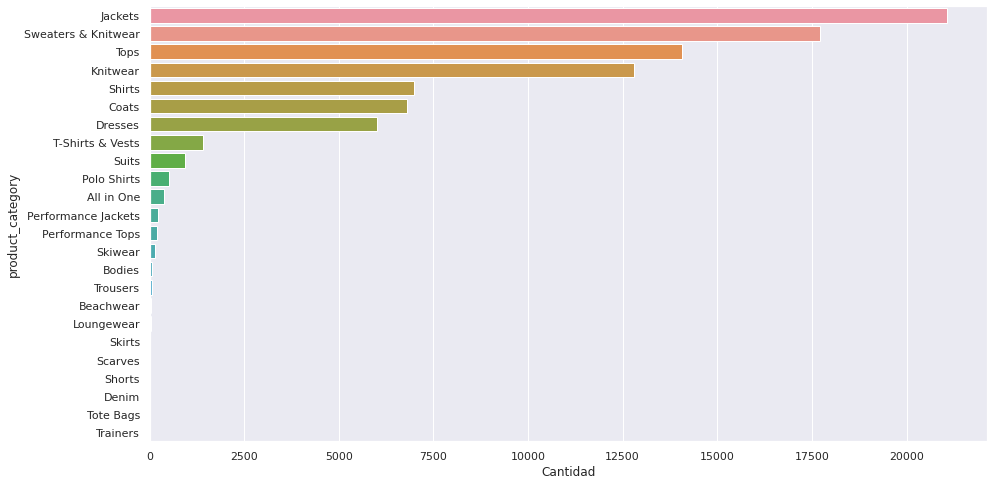

In [33]:
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(y="product_category", x="Cantidad", data=df_long_sleeves.head(1000))

Cantidad de productos por categoría

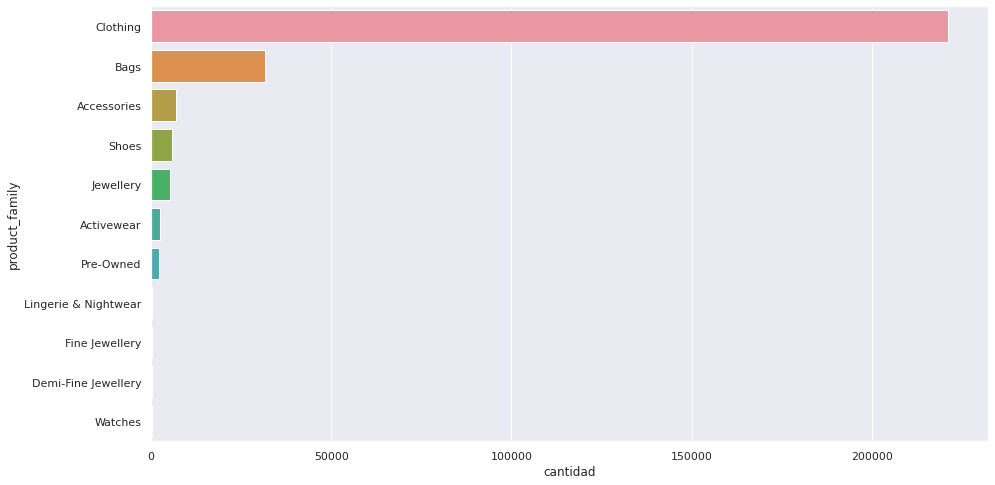

In [34]:
import seaborn as sns

df_cant=df_products.groupby('product_family').product_family.count().reset_index(name="cantidad").sort_values(by='cantidad', ascending=False)
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(y="product_family", x="cantidad", data=df_cant.head(100))

In [35]:
df_cant.query("cantidad<100")

,product_family,cantidad


Cantidad de productos por categoría

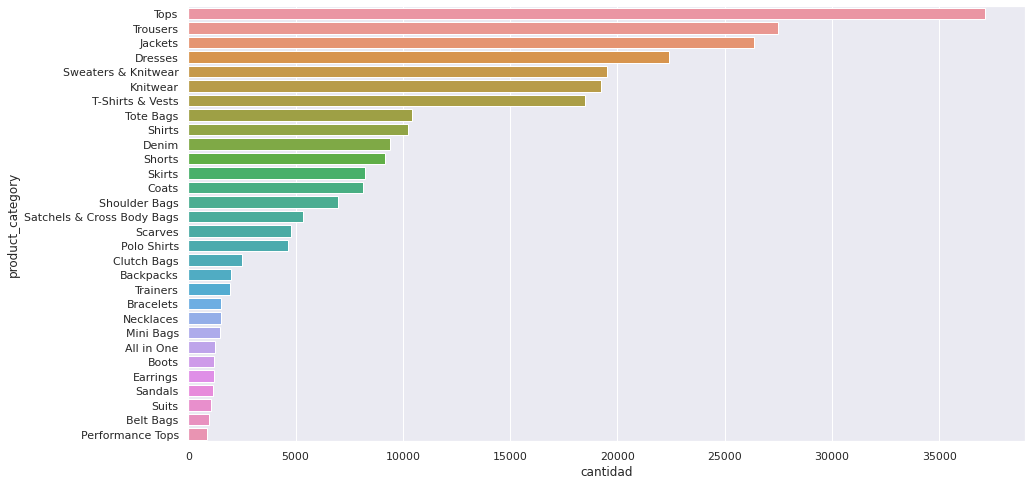

In [36]:


df_cant=df_products.groupby('product_category').product_category.count().reset_index(name="cantidad").sort_values(by='cantidad', ascending=False)
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(y="product_category", x="cantidad", data=df_cant.head(30))



Cantidad de prouctos por subcategoría

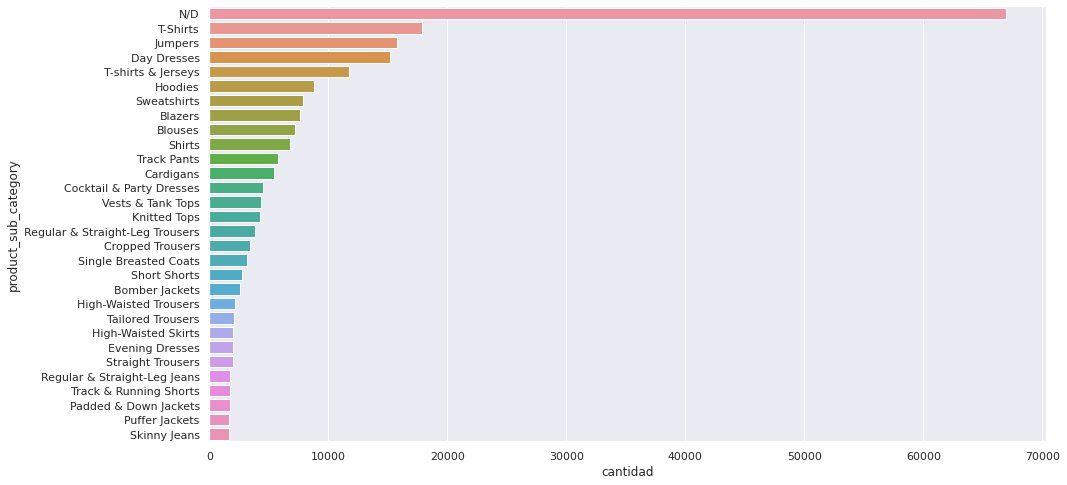

In [37]:
df_cant=df_products.groupby('product_sub_category').product_sub_category.count().reset_index(name="cantidad").sort_values(by='cantidad', ascending=False)
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(y="product_sub_category", x="cantidad", data=df_cant.head(30))

In [38]:

cant_nd=df_products.query("product_sub_category=='N/D'").groupby('product_category').product_category.count().reset_index(name="cantidad_ND").sort_values(by='cantidad_ND', ascending=False)

cant_all=df_products.groupby('product_category').product_category.count().reset_index(name="cantidad").sort_values(by='cantidad', ascending=False)

In [39]:
cant_all=cant_all.merge(cant_nd, how='left', on='product_category').sort_values(by='cantidad', ascending=False)
cant_all['cantidad_ND']=cant_all['cantidad_ND'].fillna(0)
cant_all['cant_no_ND']=cant_all['cantidad']-cant_all['cantidad_ND']

In [40]:
cant_all['cant_no_ND']

0     36305.0
1     27157.0
2     25768.0
3     21813.0
4     19410.0
       ...   
63        0.0
64        0.0
65        0.0
66        0.0
67        0.0
Name: cant_no_ND, Length: 68, dtype: float64

In [41]:
cant_all

,product_category,cantidad,cantidad_ND,cant_no_ND
0,Tops,37150,845.0,36305.0
1,Trousers,27466,309.0,27157.0
2,Jackets,26343,575.0,25768.0
3,Dresses,22379,566.0,21813.0
4,Sweaters & Knitwear,19509,99.0,19410.0
...,...,...,...,...
63,Espadrilles,80,80.0,0.0
64,Slippers,80,80.0,0.0
65,Fine Earrings,80,80.0,0.0
66,Bras,79,79.0,0.0


In [42]:
cant_all

,product_category,cantidad,cantidad_ND,cant_no_ND
0,Tops,37150,845.0,36305.0
1,Trousers,27466,309.0,27157.0
2,Jackets,26343,575.0,25768.0
3,Dresses,22379,566.0,21813.0
4,Sweaters & Knitwear,19509,99.0,19410.0
...,...,...,...,...
63,Espadrilles,80,80.0,0.0
64,Slippers,80,80.0,0.0
65,Fine Earrings,80,80.0,0.0
66,Bras,79,79.0,0.0


In [43]:
cant_all=cant_all.sort_values(by='cantidad_ND', ascending=False)

In [44]:
cant_all['porc_nd']= (cant_all['cantidad_ND'] / cant_all['cantidad']) *100


In [45]:
df_products.columns

Index(['product_id', 'product_family', 'product_category',
       'product_sub_category', 'product_gender', 'product_main_colour',
       'product_second_color', 'product_brand', 'product_materials',
       'product_short_description', 'product_attributes', 'product_image_path',
       'product_highlights', 'branch', 'name', 'maximo', 'tokenized_sentence',
       'stem', 'words_string'],
      dtype='object')

In [46]:
df_products.query('product_category=="Shirts"')

,product_id,product_family,product_category,product_sub_category,product_gender,product_main_colour,product_second_color,product_brand,product_materials,product_short_description,product_attributes,product_image_path,product_highlights,branch,name,maximo,tokenized_sentence,stem,words_string
364448,16627786,Clothing,Shirts,N/D,MEN,PURPLE,BLACK,ARIES,[Cotton],zebra-print shirt,"[{""attribute_name"":""Shirt Style"",""attribute_va...",16/62/77/86/16627786.jpg,,Clothing~Shirts~N/D,zebra print shirt men,0,"[zebra, print, shirt, men]","[z, e, b, r, a, , p, r, i, n, t, , s, h, i, ...",zebra print shirt men
364727,17335665,Clothing,Shirts,N/D,MEN,BLACK,N/D,VERSACE,[Lamb Skin],button-up leather shirt,"[{""attribute_name"":""Occasion"",""attribute_value...",17/33/56/65/17335665.jpg,"[black, lambskin, Medusa Head motif, gold-tone...",Clothing~Shirts~N/D,button up leather shirt men black lambskin med...,0,"[button, up, leather, shirt, men, black, lambs...","[b, u, t, t, o, n, , u, p, , l, e, a, t, h, ...",button up leather shirt men black lambskin med...
362687,16848974,Clothing,Shirts,N/D,MEN,BLUE,GOLD,VERSACE,[Silk],Medusa Renaissance print shirt,"[{""attribute_name"":""Occasion"",""attribute_value...",16/84/89/74/16848974.jpg,"[multicolour, silk, signature Medusa Renaissan...",Clothing~Shirts~N/D,medusa renaissance print shirt men multicolour...,0,"[medusa, renaissance, print, shirt, men, multi...","[m, e, d, u, s, a, , r, e, n, a, i, s, s, a, ...",medusa renaissance print shirt men multicolour...
369841,14653106,Clothing,Shirts,N/D,MEN,GREEN,N/D,POLO RALPH LAUREN,[Cotton],embroidered-logo button-down shirt,,14/65/31/06/14653106.jpg,,Clothing~Shirts~N/D,embroidered logo button down shirt men,0,"[embroidered, logo, button, down, shirt, men]","[e, m, b, r, o, i, d, e, r, e, d, , l, o, g, ...",embroidered logo button down shirt men
374536,18042353,Clothing,Shirts,N/D,MEN,BLUE,WHITE,NANUSHKA,[viscose],stripe-print flap-pockets shirt,"[{""attribute_name"":""Shirt Style"",""attribute_va...",18/04/23/53/18042353.jpg,"[white/blue , stripe print, straight-point col...",Clothing~Shirts~N/D,stripe print flap pockets shirt men white blue...,0,"[stripe, print, flap, pockets, shirt, men, whi...","[s, t, r, i, p, e, , p, r, i, n, t, , f, l, ...",stripe print flap pockets shirt men white blue...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364788,17539219,Clothing,Shirts,N/D,MEN,BLACK,WHITE,BURBERRY,[Cotton],checked stripe flannel shirt,"[{""attribute_name"":""Occasion"",""attribute_value...",17/53/92/19/17539219.jpg,"[black/grey, cotton, check pattern, horizontal...",Clothing~Shirts~N/D,checked stripe flannel shirt men black grey co...,0,"[checked, stripe, flannel, shirt, men, black, ...","[c, h, e, c, k, e, d, , s, t, r, i, p, e, , ...",checked stripe flannel shirt men black grey co...
365327,16531802,Clothing,Shirts,N/D,MEN,BLUE,WHITE,BARBA,[Cotton],vertical stripes shirt,"[{""attribute_name"":""Occasion"",""attribute_value...",16/53/18/02/16531802.jpg,"[sky blue/off white, cotton, vertical stripe p...",Clothing~Shirts~N/D,vertical stripes shirt men sky blue off white ...,0,"[vertical, stripes, shirt, men, sky, blue, off...","[v, e, r, t, i, c, a, l, , s, t, r, i, p, e, ...",vertical stripes shirt men sky blue off white ...
367603,17278692,Clothing,Shirts,N/D,MEN,WHITE,N/D,ETRO,[Cotton],chest-pocket cutaway-collar shirt,"[{""attribute_name"":""Occasion"",""attribute_value...",17/27/86/92/17278692.jpg,[White cotton chest-pocket cutaway-collar shir...,Clothing~Shirts~N/D,chest pocket cutaway collar shirt men white co...,0,"[chest, pocket, cutaway, collar, shirt, men, w...","[c, h, e, s, t, , p, o, c, k, e, t, , c, u, ...",chest pocket cutaway collar shirt men white co...
362138,17979029,Clothing,Shirts,N/D,MEN,GREEN,N/D,PRADA,[Recycled Polyamide],Re-Nylon utility shirt,"[{""attribute_name"":""Occasion"",""attribute_value...",17/97/90/29/17979029.jpg,"[military green, recycled polyamide, enamel tr...",Clothing~Shirts~

In [47]:
cant_all.sort_values(by='porc_nd', ascending=True)

,product_category,cantidad,cantidad_ND,cant_no_ND,porc_nd
44,Performance Jackets,258,0.0,258.0,0.0
10,Shorts,9164,0.0,9164.0,0.0
9,Denim,9376,0.0,9376.0,0.0
27,Suits,1073,0.0,1073.0,0.0
5,Knitwear,19234,0.0,19234.0,0.0
...,...,...,...,...,...
43,Loafers,277,277.0,0.0,100.0
45,Bodies,201,201.0,0.0,100.0
47,Fashion Watches,125,125.0,0.0,100.0
28,Belt Bags,955,955.0,0.0,100.0


In [48]:
cant_all.query('porc_nd>0.30')

,product_category,cantidad,cantidad_ND,cant_no_ND,porc_nd
7,Tote Bags,10437,10437.0,0.0,100.000000
8,Shirts,10221,10221.0,0.0,100.000000
13,Shoulder Bags,6954,6954.0,0.0,100.000000
14,Satchels & Cross Body Bags,5326,5326.0,0.0,100.000000
15,Scarves,4798,4798.0,0.0,100.000000
16,Polo Shirts,4644,4644.0,0.0,100.000000
17,Clutch Bags,2484,2484.0,0.0,100.000000
18,Backpacks,2010,2010.0,0.0,100.000000
20,Bracelets,1527,1527.0,0.0,100.000000
21,Necklaces,1501,1501.0,0.0,100.000000


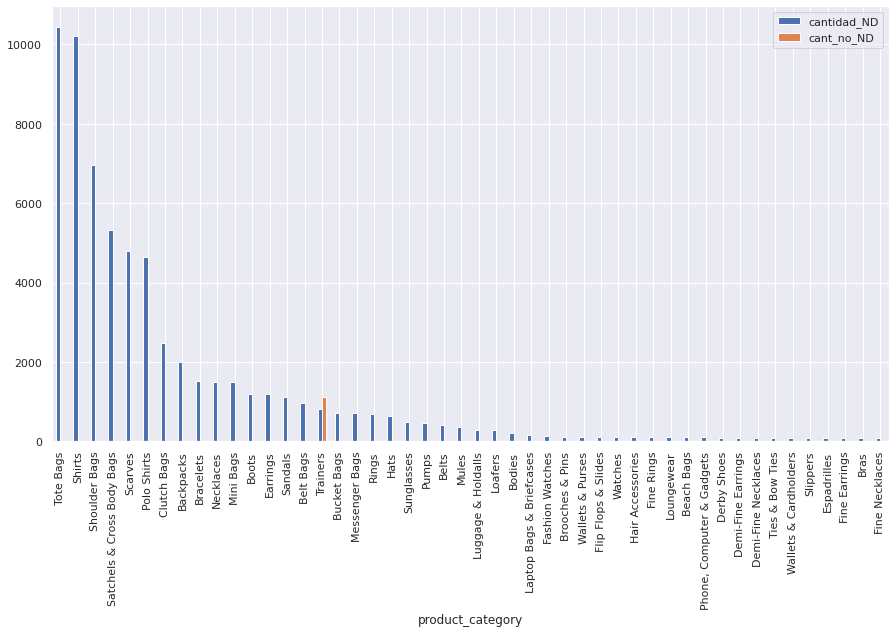

In [49]:
cant_all.query('porc_nd>30')[['product_category', 'cantidad_ND',	'cant_no_ND']].plot(x='product_category', kind='bar')

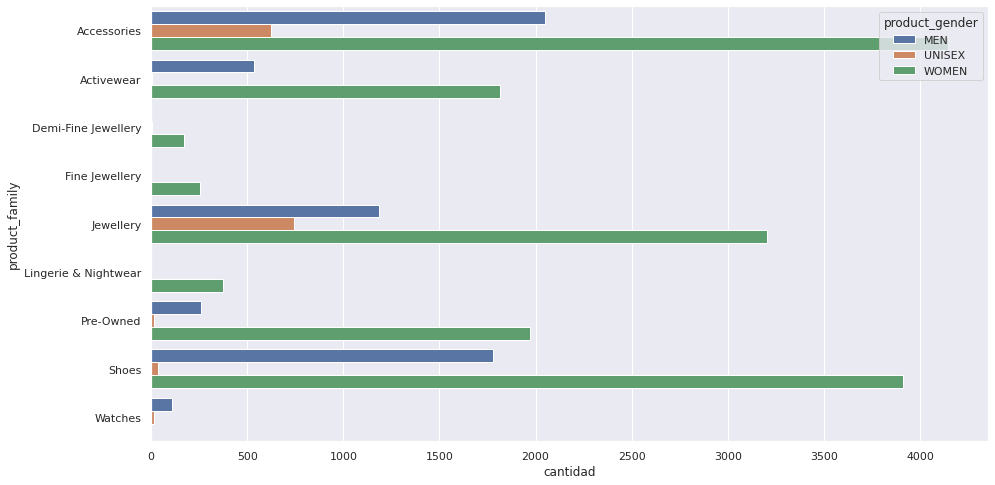

In [50]:
import seaborn as sns
df_cant=pd.DataFrame(df_products.groupby(['product_family','product_gender']).count().reset_index())
df_cant=df_cant[['product_family','product_gender','product_id']]
df_cant.columns=['product_family','product_gender','cantidad']
sns.barplot(data=df_cant.query("product_family!='Clothing' and product_family!='Bags' "), y="product_family", x="cantidad", hue="product_gender")

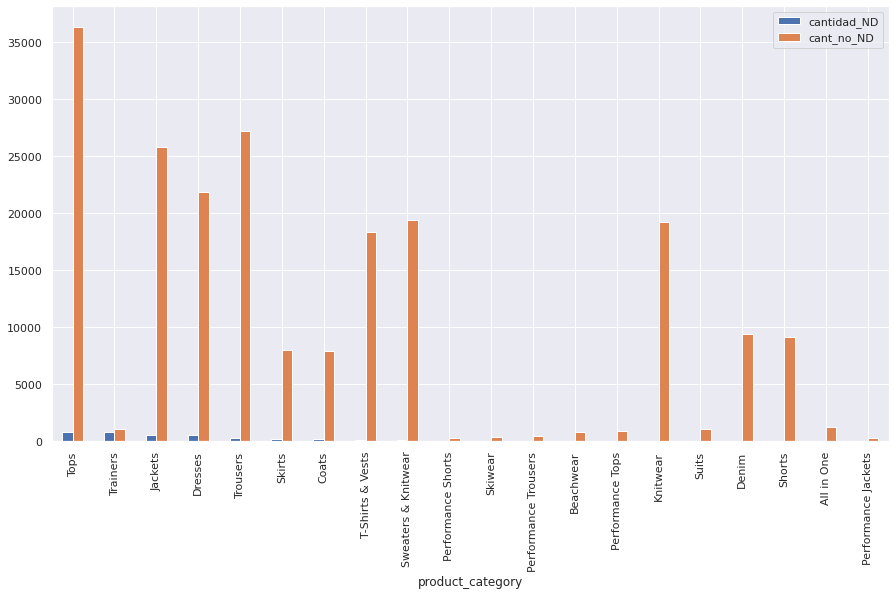

In [51]:
cant_all.query('cant_no_ND>100')[['product_category', 'cantidad_ND',	'cant_no_ND']].plot(x='product_category', kind='bar')

In [52]:

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.dummy import DummyClassifier

In [53]:
df_products['branch'] = df_products['product_family'] + '~' + df_products['product_category'] + '~' + df_products['product_sub_category']

In [54]:
def clean_text(text):
  return text.strip()
def tokenizer(text):
    #return [w for w in word_tokenize(text) if w.isalpha()] # si solo nos interesan palabras
    return word_tokenize(text)


In [55]:
pd.DataFrame(df_products.product_category.value_counts())

,product_category
Tops,37150
Trousers,27466
Jackets,26343
Dresses,22379
Sweaters & Knitwear,19509
...,...
Slippers,80
Fine Earrings,80
Espadrilles,80
Bras,79


In [56]:
db_cant_branch=pd.DataFrame(df_products.branch.value_counts().reset_index(name='cant'))

#df_products_filtered=pd.merge(db_cant_branch.query("cant>500"),df_products, left_on='index',right_on='branch',how='inner')



In [57]:
db_cant_branch.quantile(0.5)

cant    473.5
Name: 0.5, dtype: float64

In [58]:
df_products_pocos=pd.merge(db_cant_branch.query("cant<=500"),df_products, left_on='index',right_on='branch',how='inner')
df_products_pocos

,index,cant,product_id,product_family,product_category,product_sub_category,product_gender,product_main_colour,product_second_color,product_brand,...,product_short_description,product_attributes,product_image_path,product_highlights,branch,name,maximo,tokenized_sentence,stem,words_string
0,Pre-Owned~Jackets~N/D,493,17068490,Pre-Owned,Jackets,N/D,WOMEN,WHITE,NEUTRALS,Chanel Pre-Owned,...,2006 tweed jacket,,17/06/84/90/17068490.jpg,"[circa 2006, beige/bordeaux/brown, wool-cotton...",Pre-Owned~Jackets~N/D,2006 tweed jacket women circa 2006 beige borde...,0,"[2006, tweed, jacket, women, circa, 2006, beig...","[2, 0, 0, 6, , t, w, e, e, d, , j, a, c, k, ...",2006 tweed jacket women circa 2006 beige borde...
1,Pre-Owned~Jackets~N/D,493,17906936,Pre-Owned,Jackets,N/D,WOMEN,BLACK,WHITE,Christian Dior Pre-Owned,...,2010 pre-owned single-breasted belted jacket,,17/90/69/36/17906936.jpg,"[circa 2010, black/white, wool-alpaca wool ble...",Pre-Owned~Jackets~N/D,2010 pre owned single breasted belted jacket w...,0,"[2010, pre, owned, single, breasted, belted, j...","[2, 0, 1, 0, , p, r, e, , o, w, n, e, d, , ...",2010 pre owned single breasted belted jacket w...
2,Pre-Owned~Jackets~N/D,493,17415126,Pre-Owned,Jackets,N/D,MEN,BLACK,N/D,Vivienne Westwood Pre-Owned,...,1990s notched lapels double-breasted blazer,,17/41/51/26/17415126.jpg,"[circa 1990s, black, virgin wool blend, notche...",Pre-Owned~Jackets~N/D,1990s notched lapels double breasted blazer me...,0,"[1990s, notched, lapels, double, breasted, bla...","[1, 9, 9, 0, s, , n, o, t, c, h, e, d, , l, ...",1990s notched lapels double breasted blazer me...
3,Pre-Owned~Jackets~N/D,493,16048430,Pre-Owned,Jackets,N/D,WOMEN,RED,BLACK,Comme Des Garçons Pre-Owned,...,ruched heart motif jacket,,16/04/84/30/16048430.jpg,"[red/black, cotton, ruched detailing, heart mo...",Pre-Owned~Jackets~N/D,ruched heart motif jacket women red black cott...,0,"[ruched, heart, motif, jacket, women, red, bla...","[r, u, c, h, e, d, , h, e, a, r, t, , m, o, ...",ruched heart motif jacket women red black cott...
4,Pre-Owned~Jackets~N/D,493,17281368,Pre-Owned,Jackets,N/D,MEN,BLUE,N/D,Giorgio Armani Pre-Owned,...,2000s stitching detailing denim jacket,,17/28/13/68/17281368.jpg,"[circa 2000s, light blue, cotton, arcuate-stit...",Pre-Owned~Jackets~N/D,2000s stitching detailing denim jacket men cir...,0,"[2000s, stitching, detailing, denim, jacket, m...","[2, 0, 0, 0, s, , s, t, i, t, c, h, i, n, g, ...",2000s stitching detailing denim jacket men cir...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21182,Fine Jewellery~Fine Necklaces~N/D,78,14762878,Fine Jewellery,Fine Necklaces,N/D,WOMEN,N/D,N/D,FOUNDRAE,...,18kt gold clip annex link,,14/76/28/78/14762878.jpg,,Fine Jewellery~Fine Necklaces~N/D,18kt gold clip annex link women,0,"[18kt, gold, clip, annex, link, women]","[1, 8, k, t, , g, o, l, d, , c, l, i, p, , ...",18kt gold clip annex link women
21183,Fine Jewellery~Fine Necklaces~N/D,78,14840524,Fine Jewellery,Fine Necklaces,N/D,WOMEN,N/D,N/D,GIGI CLOZEAU,...,Miss Gigi 18kt yellow gold diamond necklace,"[{""attribute_name"":""Fine Material"",""attribute_...",14/84/05/24/14840524.jpg,,Fine Jewellery~Fine Necklaces~N/D,miss gigi 18kt yellow gold diamond necklace women,0,"[miss, gigi, 18kt, yellow, gold, diamond, neck...","[m, i, s, s, , g, i, g, i, , 1, 8, k, t, , ...",miss gigi 18kt yellow gold diamond necklace women
21184,Fine Jewellery~Fine Necklaces~N/D,78,10522646,Fine Jewellery,Fine Necklaces,N/D,WOMEN,METALLIC,BLACK,BLACK DAKINI,...,dias facet necklace,,10/52/26/46/10522646.jpg,,Fine Jewellery~Fine Necklaces~N/D,dias facet necklace women,0,"[dias, facet, necklace, women]","[d, i, a, s, , f, a, c, e, t, , n, e, c, k, ...",dias facet necklace women
21185,Fine Jewellery~Fine Necklaces~N/D,78,14812722,Fine Jewellery,Fine Necklaces,N/D,WOMEN,N/D,N/D,Kimai,...,18kt gold Ivy diamond necklace,,14/81/27/22/14812722.jpg,,Fine Jewellery~Fine Necklaces~N/D,18kt gold ivy diamond necklace

In [59]:
df_products_pocos

,index,cant,product_id,product_family,product_category,product_sub_category,product_gender,product_main_colour,product_second_color,product_brand,...,product_short_description,product_attributes,product_image_path,product_highlights,branch,name,maximo,tokenized_sentence,stem,words_string
0,Pre-Owned~Jackets~N/D,493,17068490,Pre-Owned,Jackets,N/D,WOMEN,WHITE,NEUTRALS,Chanel Pre-Owned,...,2006 tweed jacket,,17/06/84/90/17068490.jpg,"[circa 2006, beige/bordeaux/brown, wool-cotton...",Pre-Owned~Jackets~N/D,2006 tweed jacket women circa 2006 beige borde...,0,"[2006, tweed, jacket, women, circa, 2006, beig...","[2, 0, 0, 6, , t, w, e, e, d, , j, a, c, k, ...",2006 tweed jacket women circa 2006 beige borde...
1,Pre-Owned~Jackets~N/D,493,17906936,Pre-Owned,Jackets,N/D,WOMEN,BLACK,WHITE,Christian Dior Pre-Owned,...,2010 pre-owned single-breasted belted jacket,,17/90/69/36/17906936.jpg,"[circa 2010, black/white, wool-alpaca wool ble...",Pre-Owned~Jackets~N/D,2010 pre owned single breasted belted jacket w...,0,"[2010, pre, owned, single, breasted, belted, j...","[2, 0, 1, 0, , p, r, e, , o, w, n, e, d, , ...",2010 pre owned single breasted belted jacket w...
2,Pre-Owned~Jackets~N/D,493,17415126,Pre-Owned,Jackets,N/D,MEN,BLACK,N/D,Vivienne Westwood Pre-Owned,...,1990s notched lapels double-breasted blazer,,17/41/51/26/17415126.jpg,"[circa 1990s, black, virgin wool blend, notche...",Pre-Owned~Jackets~N/D,1990s notched lapels double breasted blazer me...,0,"[1990s, notched, lapels, double, breasted, bla...","[1, 9, 9, 0, s, , n, o, t, c, h, e, d, , l, ...",1990s notched lapels double breasted blazer me...
3,Pre-Owned~Jackets~N/D,493,16048430,Pre-Owned,Jackets,N/D,WOMEN,RED,BLACK,Comme Des Garçons Pre-Owned,...,ruched heart motif jacket,,16/04/84/30/16048430.jpg,"[red/black, cotton, ruched detailing, heart mo...",Pre-Owned~Jackets~N/D,ruched heart motif jacket women red black cott...,0,"[ruched, heart, motif, jacket, women, red, bla...","[r, u, c, h, e, d, , h, e, a, r, t, , m, o, ...",ruched heart motif jacket women red black cott...
4,Pre-Owned~Jackets~N/D,493,17281368,Pre-Owned,Jackets,N/D,MEN,BLUE,N/D,Giorgio Armani Pre-Owned,...,2000s stitching detailing denim jacket,,17/28/13/68/17281368.jpg,"[circa 2000s, light blue, cotton, arcuate-stit...",Pre-Owned~Jackets~N/D,2000s stitching detailing denim jacket men cir...,0,"[2000s, stitching, detailing, denim, jacket, m...","[2, 0, 0, 0, s, , s, t, i, t, c, h, i, n, g, ...",2000s stitching detailing denim jacket men cir...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21182,Fine Jewellery~Fine Necklaces~N/D,78,14762878,Fine Jewellery,Fine Necklaces,N/D,WOMEN,N/D,N/D,FOUNDRAE,...,18kt gold clip annex link,,14/76/28/78/14762878.jpg,,Fine Jewellery~Fine Necklaces~N/D,18kt gold clip annex link women,0,"[18kt, gold, clip, annex, link, women]","[1, 8, k, t, , g, o, l, d, , c, l, i, p, , ...",18kt gold clip annex link women
21183,Fine Jewellery~Fine Necklaces~N/D,78,14840524,Fine Jewellery,Fine Necklaces,N/D,WOMEN,N/D,N/D,GIGI CLOZEAU,...,Miss Gigi 18kt yellow gold diamond necklace,"[{""attribute_name"":""Fine Material"",""attribute_...",14/84/05/24/14840524.jpg,,Fine Jewellery~Fine Necklaces~N/D,miss gigi 18kt yellow gold diamond necklace women,0,"[miss, gigi, 18kt, yellow, gold, diamond, neck...","[m, i, s, s, , g, i, g, i, , 1, 8, k, t, , ...",miss gigi 18kt yellow gold diamond necklace women
21184,Fine Jewellery~Fine Necklaces~N/D,78,10522646,Fine Jewellery,Fine Necklaces,N/D,WOMEN,METALLIC,BLACK,BLACK DAKINI,...,dias facet necklace,,10/52/26/46/10522646.jpg,,Fine Jewellery~Fine Necklaces~N/D,dias facet necklace women,0,"[dias, facet, necklace, women]","[d, i, a, s, , f, a, c, e, t, , n, e, c, k, ...",dias facet necklace women
21185,Fine Jewellery~Fine Necklaces~N/D,78,14812722,Fine Jewellery,Fine Necklaces,N/D,WOMEN,N/D,N/D,Kimai,...,18kt gold Ivy diamond necklace,,14/81/27/22/14812722.jpg,,Fine Jewellery~Fine Necklaces~N/D,18kt gold ivy diamond necklace

In [60]:
from sklearn.model_selection import train_test_split
"""train_set, test_set, _, _= train_test_split(
    df_products,
    df_products['branch'].values,
    test_size     = 0.3,
    stratify      = df_products['branch'].values,
    shuffle       = True
)

#test_set, val_set, _, _= train_test_split(
#    test_set,
#    test_set['branch'].values,
#    test_size     = 0.30,
#    shuffle       = False
#)"""
train_set=df_products

test_set=df_test
del(df_test)

In [61]:
from sklearn.feature_extraction.text import TfidfTransformer # Creador de tf-idf
from sklearn.decomposition import TruncatedSVD # Singular Value Decomposition
from scipy.spatial.distance import cosine as cosine_distance
"""def get_topics_lsa(df, df_test, column,n_components=2):  


# Creación del objeto SVD
  svd = TruncatedSVD(n_components = n_components)
  count = CountVectorizer(min_df = 10, max_df = 0.90, stop_words = stoplist ,ngram_range=(1,2))
 
    # Ajustamos con los datos. Acá especificamente creamos una matriz documentos-términos
  x_count = count.fit_transform(df[column])
  x_count_test=count.transform(df_test[column])

  print(count.get_feature_names_out())
  # Creamos el objeto tf-idf. Le decimos además que devuelva los
  # vectores documento con norma euclídea igual a 1 (norm = 'l2')
  tfidf = TfidfTransformer(
    
  )

  # Creamos la matriz tf-idf a partir de la matriz de frecuencias
  x_tfidf = tfidf.fit_transform(x_count)
  x_tfidf_test=tfidf.transform(x_count_test)
  # Ajuste con los datos y descripción en el espacio reducido
  # Trabajamos con la matriz traspuesta
  x_svd = svd.fit_transform(x_tfidf.T)
  x_svd_test=svd.fit_transform(x_tfidf_test.T)
  # Dimensión de la matriz de datos en el espacio reducido
  print(x_svd.shape)
  
  vocabulary = {item: key for key, item in count.vocabulary_.items()}
  #vocabulary = {item: key for key, item in count.vocabulary_.items()} 
  #similarities = [1.00 - cosine_distance(x_svd[index_word], x_svd[i]) for i in range(x_svd.shape[0])]
  evr = svd.explained_variance_ratio_

  # Graficamos la fracción de varianza que aporta cada componente
  # y la información acumulada
  fig, ax = plt.subplots(1, 2, figsize = (12, 4))

  ax[0].plot(range(1, len(evr) + 1), evr, '-', linewidth = 3)
  ax[0].set_ylabel('Fracción de varianza explicada')
  ax[0].set_xlabel('Número de valor singular')

  # Calculamos el acumulado con la función cumsum de numpy 
  varianza_acumulada = np.cumsum(evr)

  ax[1].plot(range(1, len(evr) + 1), varianza_acumulada, '-', linewidth = 3)
  ax[1].set_ylabel('Fracción acumulada de varianza explicada')
  ax[1].set_xlabel('Cantidad de valores singulares')
 
  return x_svd,vocabulary,count, svd,x_count,x_tfidf,x_tfidf_test
  # con .explained_variance_ratio_ vemos la fracción de información que aporta cada componente"""

"def get_topics_lsa(df, df_test, column,n_components=2):  \n\n\n# Creación del objeto SVD\n  svd = TruncatedSVD(n_components = n_components)\n  count = CountVectorizer(min_df = 10, max_df = 0.90, stop_words = stoplist ,ngram_range=(1,2))\n \n    # Ajustamos con los datos. Acá especificamente creamos una matriz documentos-términos\n  x_count = count.fit_transform(df[column])\n  x_count_test=count.transform(df_test[column])\n\n  print(count.get_feature_names_out())\n  # Creamos el objeto tf-idf. Le decimos además que devuelva los\n  # vectores documento con norma euclídea igual a 1 (norm = 'l2')\n  tfidf = TfidfTransformer(\n    \n  )\n\n  # Creamos la matriz tf-idf a partir de la matriz de frecuencias\n  x_tfidf = tfidf.fit_transform(x_count)\n  x_tfidf_test=tfidf.transform(x_count_test)\n  # Ajuste con los datos y descripción en el espacio reducido\n  # Trabajamos con la matriz traspuesta\n  x_svd = svd.fit_transform(x_tfidf.T)\n  x_svd_test=svd.fit_transform(x_tfidf_test.T)\n  # Dimen

Arma matriz de frecuencia y entrena con Naive Bayes

In [62]:
from sklearn.metrics import f1_score
# incluyo bigramas (aclaracion:si aparece "best friend" tambien va a contar para "best" y para "friend")
clf = MultinomialNB(alpha=0.8)

count_vect = CountVectorizer(preprocessor=clean_text, 
                             tokenizer=tokenizer, 
                             min_df=10,
                             stop_words=stoplist,
                             ngram_range=(1,1) #,
                             #max_df = 0.99
                             )
X_train_ngrams = count_vect.fit_transform(train_set.name) # cuenta frecuencia de tokens y define el diccionario


print("numero de features=",X_train_ngrams.shape[1])
clf.fit(X_train_ngrams, train_set.branch)
f1_score(test_set.branch, clf.predict(count_vect.transform(test_set.name)), average='macro')
#scores_cv_ngrams = cross_val_score(clf,X_train_ngrams, train_set.branch,cv = 10, scoring='f1_macro')
#print("f-score=",round(scores_cv_ngrams.mean(),4)," ( sd =",round(scores_cv_ngrams.std(),4),")")z

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  % sorted(inconsistent)


numero de features= 4303


0.5280089819109772

In [63]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report as cr
y_pred=clf.predict(count_vect.transform(test_set.name))
metrics=(cr(test_set.branch, y_pred, labels=test_set.branch.unique()))



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
print(metrics)

                                                               precision    recall  f1-score   support

                         Clothing~Sweaters & Knitwear~Hoodies       0.93      0.92      0.93      2635
                             Clothing~Tops~T-shirts & Jerseys       0.84      0.78      0.81      5015
                                Clothing~Trousers~Track Pants       0.82      0.88      0.85      2469
                                Shoes~Flip Flops & Slides~N/D       0.87      0.28      0.43        46
                                 Clothing~Dresses~Day Dresses       0.78      0.67      0.72      6499
                                           Bags~Tote Bags~N/D       0.83      0.86      0.85      4473
                    Clothing~Dresses~Cocktail & Party Dresses       0.47      0.62      0.53      1946
                   Clothing~Skirts~Asymmetric & Draped Skirts       0.54      0.51      0.52       344
                             Clothing~Jackets~Cropped Jackets       0.50

In [65]:
def pandas_classification_report(y_true, y_pred,labels):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred ,labels=labels)
    
    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted',labels=labels))

    metrics_sum_index = ['precision', 'recall', 'f1', 'support']
    class_report_df = pd.DataFrame(
       
        list(metrics_summary),
        index=metrics_sum_index
        )
   
    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total
    
    class_report_df['avg / total'] = avg

    return class_report_df.T

results=pandas_classification_report(test_set.branch, y_pred,labels=test_set.branch.unique())

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
l=(list(test_set.branch.unique()))
l.append('Total')

results['label']=l

In [67]:

results.sort_values(by='f1',ascending=False).query('f1<0.69')[['label','precision',	'recall',	'f1'	,'support'	]]

,label,precision,recall,f1,support
113,Clothing~Trousers~Chinos,0.604585,0.797732,0.687857,529.0
111,Clothing~Coats~Double Breasted & Peacoats,0.659517,0.708934,0.683333,347.0
115,Clothing~Skirts~Pleated Skirts,0.631799,0.729469,0.677130,414.0
55,Clothing~Jackets~Puffer Jackets,0.552028,0.873082,0.676391,717.0
120,Clothing~Denim~Flared Jeans,0.715116,0.634021,0.672131,194.0
...,...,...,...,...,...
150,Clothing~Tops~Cardigans,0.000000,0.000000,0.000000,65.0
152,Clothing~Shorts~Mini Shorts,0.000000,0.000000,0.000000,104.0
166,Activewear~Performance Jackets~Performance Tra...,0.000000,0.000000,0.000000,37.0
193,Clothing~Jackets~Suit & Dinner Jackets,0.000000,0.000000,0.000000,37.0


In [68]:
results.sort_values(by='f1',ascending=False)[['label','precision',	'recall',	'f1'	,'support'	]]

,label,precision,recall,f1,support
130,Accessories~Sunglasses~N/D,1.000000,0.970443,0.985000,203.0
31,Shoes~Boots~N/D,0.942308,0.957031,0.949612,512.0
22,Accessories~Scarves~N/D,0.965760,0.932426,0.948800,2057.0
13,Clothing~T-Shirts & Vests~T-Shirts,0.944875,0.925965,0.935324,7645.0
132,Watches~Fashion Watches~N/D,0.881356,0.981132,0.928571,53.0
...,...,...,...,...,...
150,Clothing~Tops~Cardigans,0.000000,0.000000,0.000000,65.0
152,Clothing~Shorts~Mini Shorts,0.000000,0.000000,0.000000,104.0
166,Activewear~Performance Jackets~Performance Tra...,0.000000,0.000000,0.000000,37.0
193,Clothing~Jackets~Suit & Dinner Jackets,0.000000,0.000000,0.000000,37.0


In [69]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(test_set.branch,y_pred, labels=test_set.branch.unique())
cm


import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
"""color = 'white'
matrix = plot_confusion_matrix( clf, count_vect.transform(test_set.name),test_set.branch , cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.figure(figsize = (40,28))
plt.show()"""

"color = 'white'\nmatrix = plot_confusion_matrix( clf, count_vect.transform(test_set.name),test_set.branch , cmap=plt.cm.Blues)\nmatrix.ax_.set_title('Confusion Matrix', color=color)\nplt.xlabel('Predicted Label', color=color)\nplt.ylabel('True Label', color=color)\nplt.gcf().axes[0].tick_params(colors=color)\nplt.gcf().axes[1].tick_params(colors=color)\nplt.figure(figsize = (40,28))\nplt.show()"

In [70]:
pd.DataFrame(cm, index=test_set.branch.unique())

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,193
Clothing~Sweaters & Knitwear~Hoodies,2429,0,4,0,1,0,0,0,0,7,...,0,0,0,0,1,0,0,0,0,0
Clothing~Tops~T-shirts & Jerseys,0,3929,0,0,69,3,15,0,1,3,...,0,0,1,0,0,0,0,0,0,0
Clothing~Trousers~Track Pants,4,0,2177,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Shoes~Flip Flops & Slides~N/D,0,0,0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Clothing~Dresses~Day Dresses,0,138,0,0,4348,0,963,1,1,0,...,0,0,0,0,0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bags~Beach Bags~N/D,0,0,0,0,0,24,0,0,0,0,...,0,0,0,0,0,13,0,0,0,0
Shoes~Espadrilles~N/D,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,13,0,0,0
Clothing~Beachwear~Beach Cover-Ups,0,2,0,0,11,0,0,5,0,0,...,0,0,0,0,0,0,0,1,0,0
Clothing~Denim~Boyfriend Jeans,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12,0


In [71]:
from sklearn.decomposition import TruncatedSVD 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
import gc

del(df_products)
del(df_products_pocos)
del(words)

gc.collect()
tfidf = TfidfTransformer(norm = 'l2')
x_tfidf = tfidf.fit_transform(X_train_ngrams)
del(X_train_ngrams)
gc.collect()

svd_model = TruncatedSVD(n_components=500) 
x_svd = svd_model.fit_transform(x_tfidf)
del(x_tfidf)
gc.collect()


encoder = LabelBinarizer()
transfomed_label = encoder.fit_transform(train_set.branch)




In [72]:
x=x_svd #scaler.transform(x_svd)
del(x_svd)
gc.collect()
y=transfomed_label
n,d_in=x.shape



_,d_out=y.shape



# Creo un modelo Red Neuronal 
modelo = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 2 salidas, activación relu
    
    #keras.layers.Dense(5096,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),input_shape=(d_in,), activation="relu",kernel_initializer='he_uniform', bias_initializer='zeros'),
    keras.layers.Dense(2048,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),input_shape=(d_in,), activation="LeakyReLU",kernel_initializer='he_uniform', bias_initializer='zeros'),
    keras.layers.Dense(1024,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), activation="LeakyReLU",kernel_initializer='he_uniform', bias_initializer='zeros'),
    keras.layers.Dense(512,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), activation="LeakyReLU",kernel_initializer='he_uniform', bias_initializer='zeros'),
    keras.layers.Dense(256,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), activation="LeakyReLU",kernel_initializer='he_uniform', bias_initializer='zeros'),

    #keras.layers.Dense(128,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), activation="relu",kernel_initializer='he_uniform', bias_initializer='zeros'),
    #keras.layers.Dense(64,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), activation="relu",kernel_initializer='he_uniform', bias_initializer='zeros' ),
    #keras.layers.Dense(32,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), activation="relu",kernel_initializer='he_uniform', bias_initializer='zeros',  ),
   # keras.layers.Dense(2028,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), activation="relu",kernel_initializer='he_uniform', bias_initializer='zeros',  ),

    #keras.layers.Dropout(0.4),
    #la ultima capa si o si tiene que tener tantas salidas como valores a predecir
    keras.layers.Dense(d_out,activation="softmax" )])

# visualización del modelo inicial (si hay solo 2 variables de entrada)
#if d_in==1:
#    rnutil.plot_regression1D(modelo,x,y,title=f"Modelo inicial",xlabel=column,ylabel="Consumo")


modelo.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001), 
  loss=tf.keras.losses.CategoricalCrossentropy(), 
  # metricas para ir calculando en cada iteracion o batch 
  # Agregamos el accuracy del modelo
  metrics=['accuracy'], 
)

# Entrenamiento del modelo
print("Entrenando....")
history = modelo.fit(x,y,epochs=100,batch_size=512,verbose=True, validation_split = 0.2)
#rnutil.plot_training_curves(history)

history_frame = pd.DataFrame(history.history)

Entrenando....
Epoch 1/100
432/432 [==============================] - 7s 10ms/step - loss: 2.1052 - accuracy: 0.7583 - val_loss: 1.3923 - val_accuracy: 0.7929
Epoch 2/100
432/432 [==============================] - 4s 9ms/step - loss: 1.2145 - accuracy: 0.8057 - val_loss: 1.1193 - val_accuracy: 0.8029
Epoch 3/100
432/432 [==============================] - 4s 8ms/step - loss: 1.0222 - accuracy: 0.8129 - val_loss: 0.9808 - val_accuracy: 0.8101
Epoch 4/100
432/432 [==============================] - 4s 8ms/step - loss: 0.9235 - accuracy: 0.8179 - val_loss: 0.9142 - val_accuracy: 0.8129
Epoch 5/100
432/432 [==============================] - 4s 9ms/step - loss: 0.8639 - accuracy: 0.8219 - val_loss: 0.8606 - val_accuracy: 0.8183
Epoch 6/100
432/432 [==============================] - 4s 9ms/step - loss: 0.8243 - accuracy: 0.8239 - val_loss: 0.8287 - val_accuracy: 0.8205
Epoch 7/100
432/432 [==============================] - 4s 8ms/step - loss: 0.7986 - accuracy: 0.8252 - val_loss: 0.8141 - val_

In [73]:
del(x)
gc.collect()
x_count_test= count_vect.transform(test_set.name)
x_tfidf_test= tfidf.transform(x_count_test)
x_test_svd=svd_model.transform(x_tfidf_test)




In [74]:
y_predicted=modelo.predict(x_test_svd)

3698/3698 [==============================] - 6s 2ms/step


In [75]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
test_predictions = np.argmax(modelo.predict(x_test_svd), axis=-1)
y_real_test = encoder.fit_transform(test_set.branch)
from sklearn.metrics import accuracy_score
real=np.argmax(y_real_test, axis=-1)
acc=accuracy_score(real,test_predictions )
print(acc)

3698/3698 [==============================] - 6s 2ms/step
0.824992394280499


In [76]:
metrics=(cr(real,test_predictions))
print(metrics)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.89      0.91      0.90       180
           1       0.33      0.64      0.44        45
           2       0.91      0.94      0.93       278
           3       0.47      0.17      0.25        41
           4       0.97      0.98      0.98      2057
           5       0.99      0.97      0.98       203
           6       1.00      0.86      0.92        35
           7       0.33      0.57      0.42        35
           8       0.38      0.62      0.47        47
           9       0.00      0.00      0.00        37
          10       0.38      0.18      0.24        74
          11       0.30      0.08      0.13        37
          12       0.57      0.53      0.55        77
          13       0.30      0.23      0.26        62
          14       0.00      0.00      0.00        50
          15       0.38      0.16      0.22        64
          16       0.87      0.23      0.37        56
          17       0.31    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


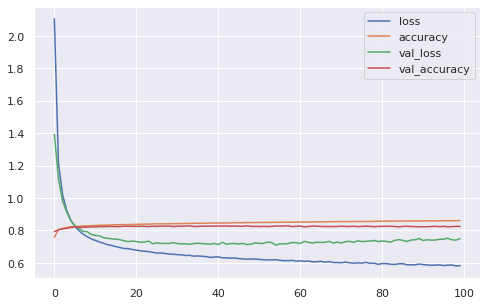

In [77]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
encoder.classes_

array(['Accessories~Belts~N/D', 'Accessories~Hair Accessories~N/D',
       'Accessories~Hats~N/D',
       'Accessories~Phone, Computer & Gadgets~N/D',
       'Accessories~Scarves~N/D', 'Accessories~Sunglasses~N/D',
       'Accessories~Ties & Bow Ties~N/D',
       'Accessories~Wallets & Cardholders~N/D',
       'Accessories~Wallets & Purses~N/D',
       'Activewear~Performance Footwear~Performance Trainers',
       'Activewear~Performance Jackets~Lightweight Jackets',
       'Activewear~Performance Jackets~Performance Track Jackets',
       'Activewear~Performance Shorts~Cycling Shorts',
       'Activewear~Performance Shorts~Running Shorts',
       'Activewear~Performance Tops~Performance Sweatshirts & Hoodies',
       'Activewear~Performance Tops~Performance T-Shirts',
       'Activewear~Performance Tops~Performance T-Shirts & Vests',
       'Activewear~Performance Tops~Performance Tank Tops',
       'Activewear~Performance Tops~Sports Bras',
       'Activewear~Performance Trousers~Per

In [ ]:
len(test_predictions)

118332

In [ ]:
encoder.classes_

cm = confusion_matrix(real,test_predictions)

In [ ]:
pd.DataFrame(cm, index=encoder.classes_,columns=encoder.classes_).to_csv('errorAnalysis.csv')

In [ ]:
!pip install interpret-community
!pip install raiwidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 130 kB 31.0 MB/s 
     |████████████████████████████████| 569 kB 46.1 MB/s 
     |████████████████████████████████| 6.6 MB 60.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 25.0 MB/s 
     |████████████████████████████████| 177 kB 62.2 MB/s 
     |████████████████████████████████| 130 kB 68.5 MB/s 
     |████████████████████████████████| 792 kB 53.3 MB/s 
     |████████████████████████████████| 150 kB 61.8 MB/s 
     |████████████████████████████████| 5.8 MB 57.3 MB/s 
     |████████████████████████████████| 254 kB 74.4 MB/s 
     |████████████████████████████████| 1.6 MB 62.5 MB/s 
     |████████████████████████████████| 1.6 MB 61.6 MB/s 
     |████████████████████████████████| 213 kB 3.4 MB/s 
     |████████████████████████████████| 3.3 MB 3.